Rainfall Weather Forecasting

Project Description:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and
using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

1. Problem Statement:
a) Design a predictive model with the use of machine learning algorithms to forecast whether or
not it will rain tomorrow.
b) Design a predictive model with the use of machine learning algorithms to predict how much
rainfall could be there.

Dataset Description:
Number of columns: 23

Dataset Link- https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv

In [2]:
# Importing neccessary librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\dataset3-main\weatherAUS.csv")
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [3]:
# Data type of columns 
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [4]:
# For checking dataset diemensions 
df.shape 

(8425, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
# Summarizing the distribution of the numerical variables.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Checking for missing value

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Dataset columns content high number of NaN value . We have to check each columns for unique values they contain. Its help to understand with Data.

In [8]:
df['RainTomorrow'].nunique()

2

Labeled columns have 2 unique category that mean Classification problem.

Value count of Categorical columns

In [9]:
df['Rainfall'].value_counts()

0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: Rainfall, Length: 250, dtype: int64

Second Labeled columns have 250 unique category that mean Regression problem.

In [10]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [11]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [12]:
df['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [13]:
# Remove rows with missing values in the target column ("RainTomorrow")
df = df.dropna(subset=['RainTomorrow'])

# Impute missing values for numerical columns with the mean
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                     'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                     'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values for categorical columns with the mode
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

Data Visualization

1.Using Univariate Plots

In [15]:
categorical_columns = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow']

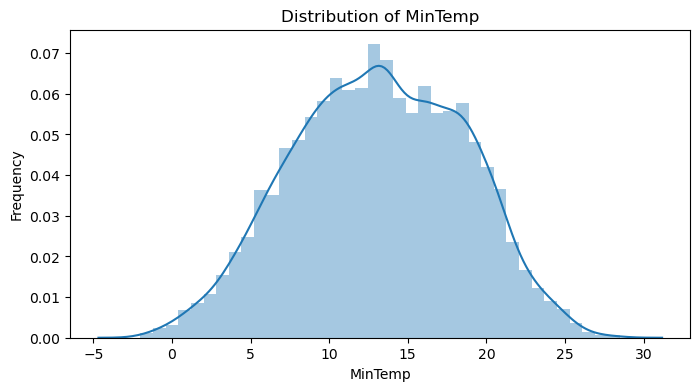

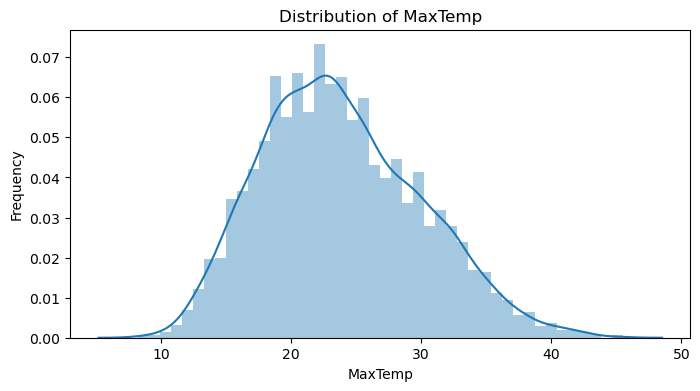

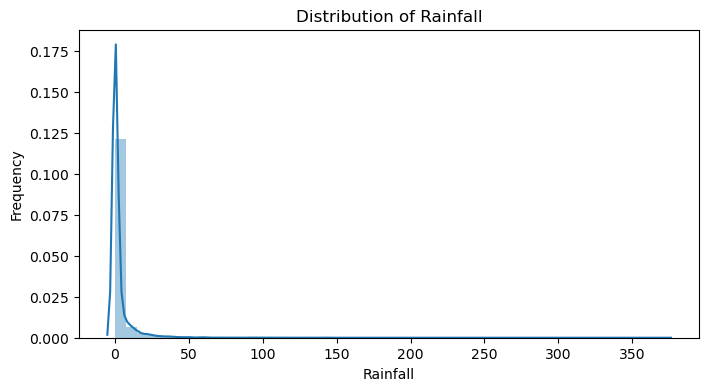

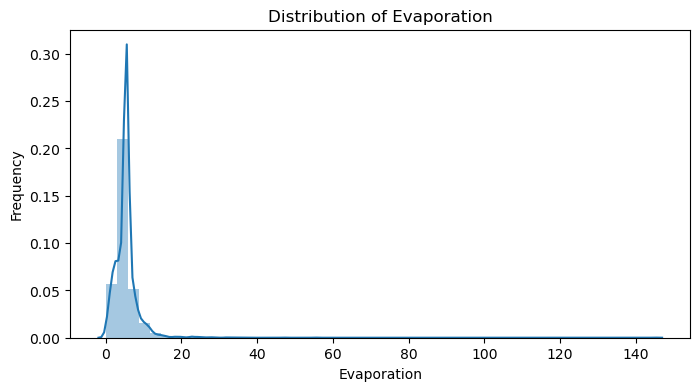

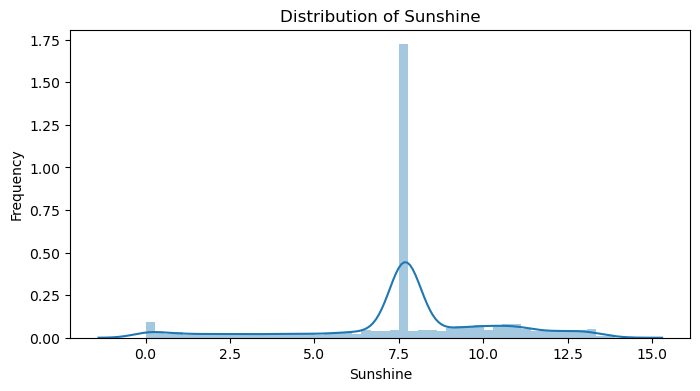

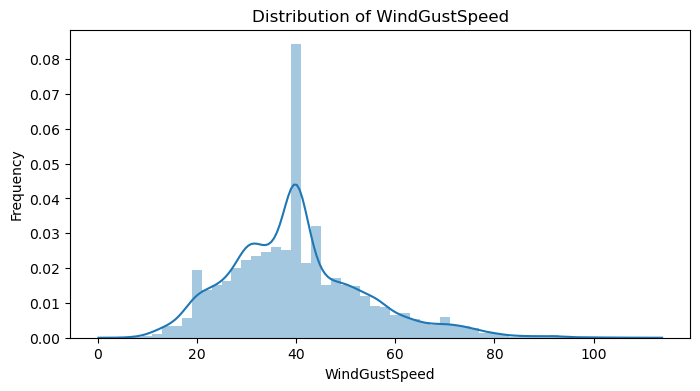

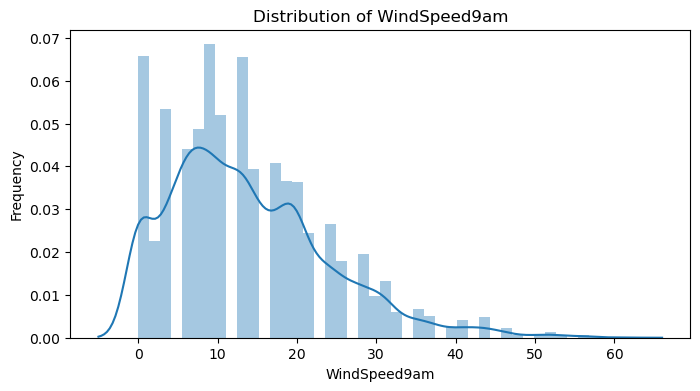

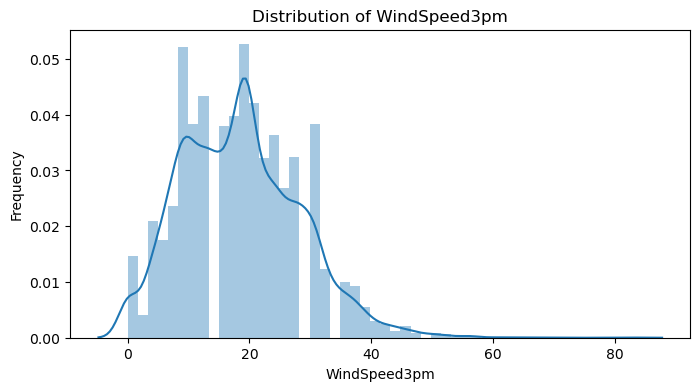

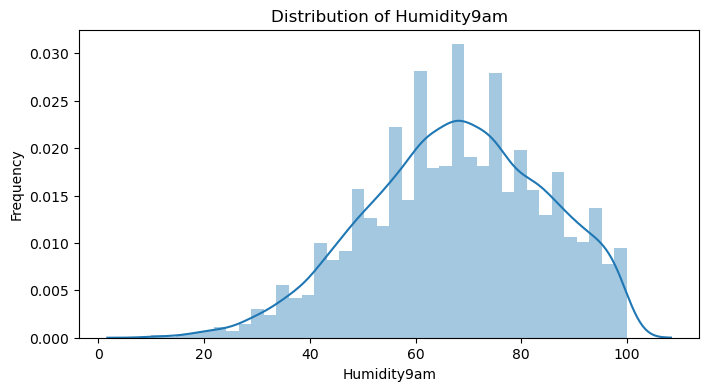

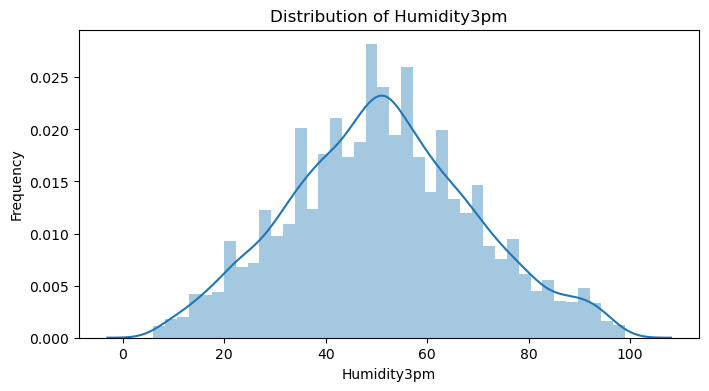

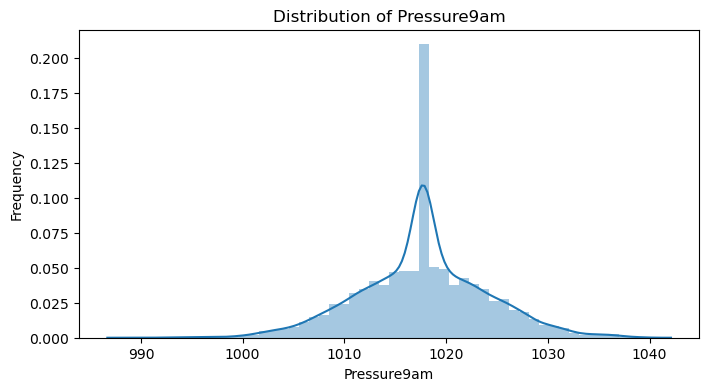

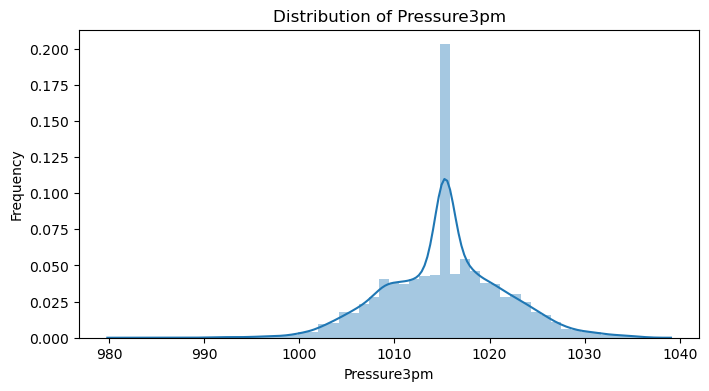

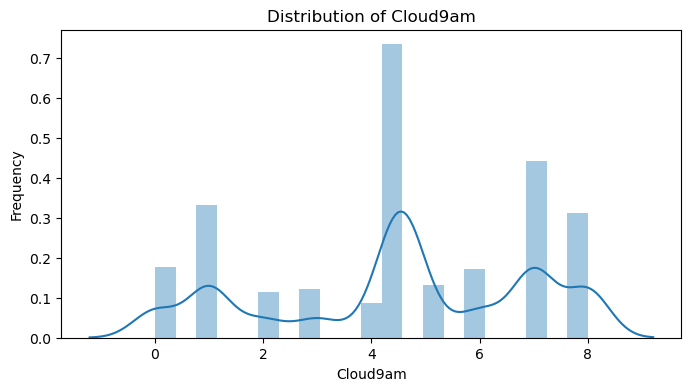

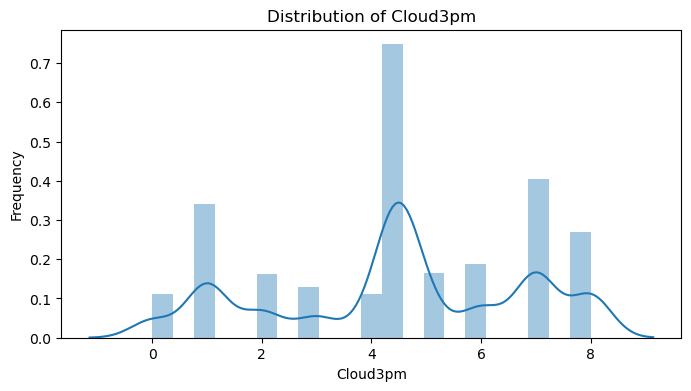

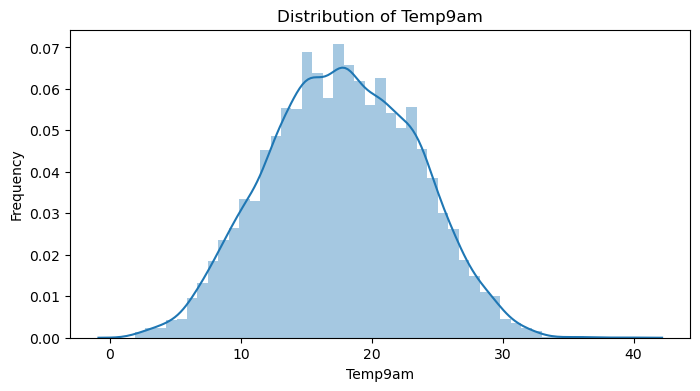

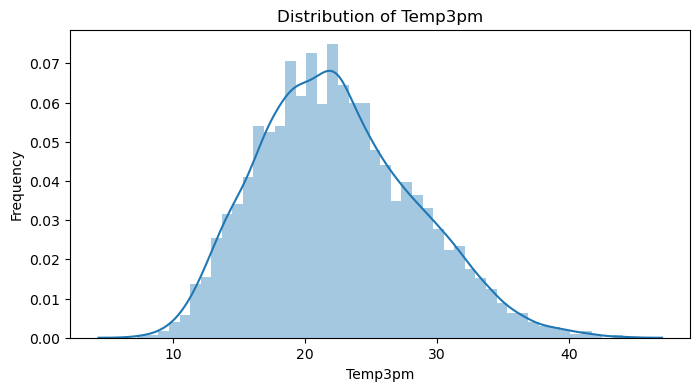

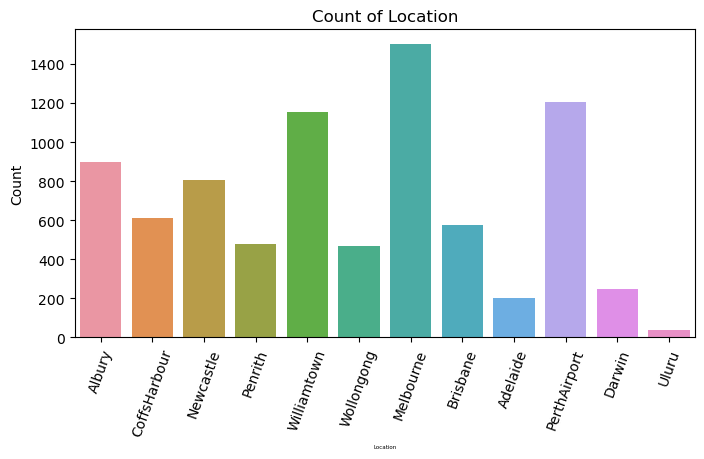

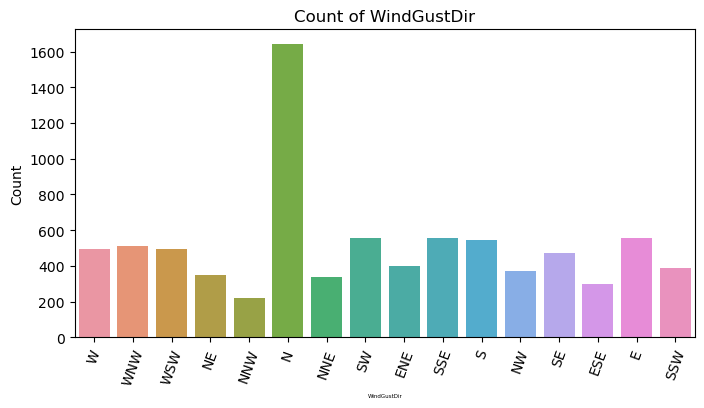

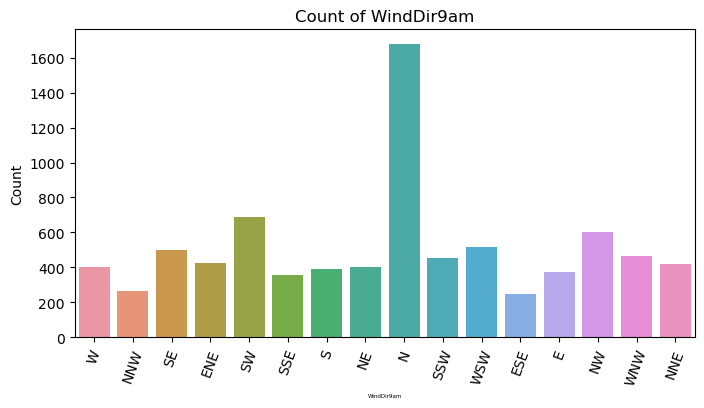

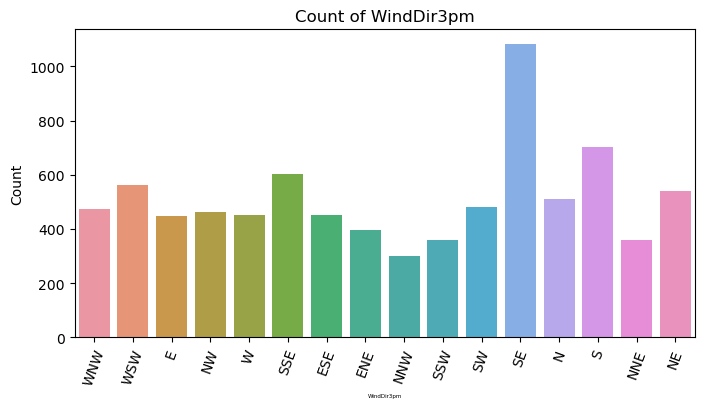

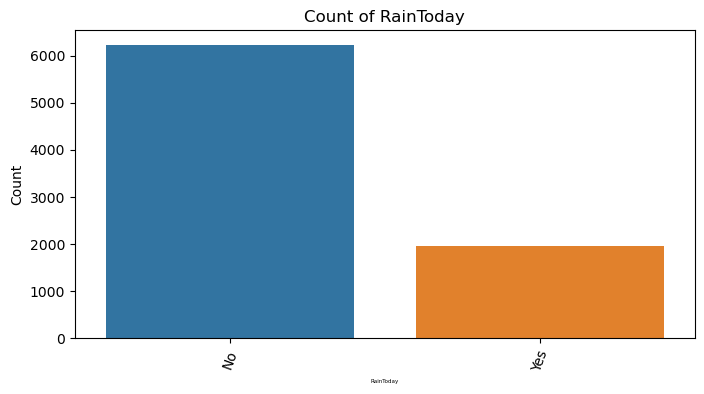

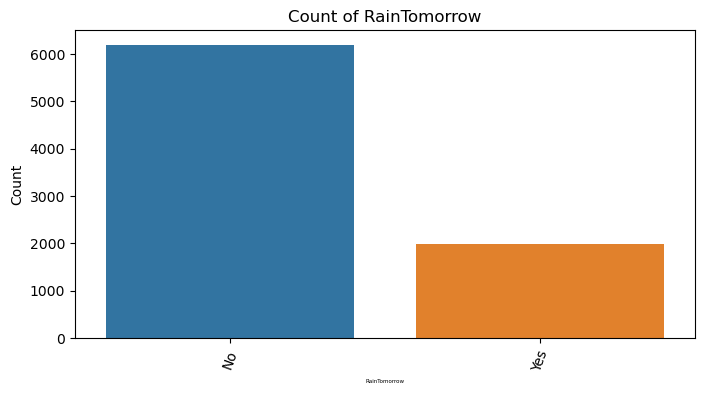

In [16]:
# Create univariate plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))  
    sns.distplot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Create univariate plots for object columns
for column in categorical_columns:
    plt.figure(figsize=(8, 4))  
    sns.countplot(data=df, x=column)  
    plt.title(f'Count of {column}')
    plt.xlabel(column,fontsize=4)
    plt.ylabel('Count')
    plt.xticks(rotation=70) 
    plt.show()

2.Using Multivariate Plots

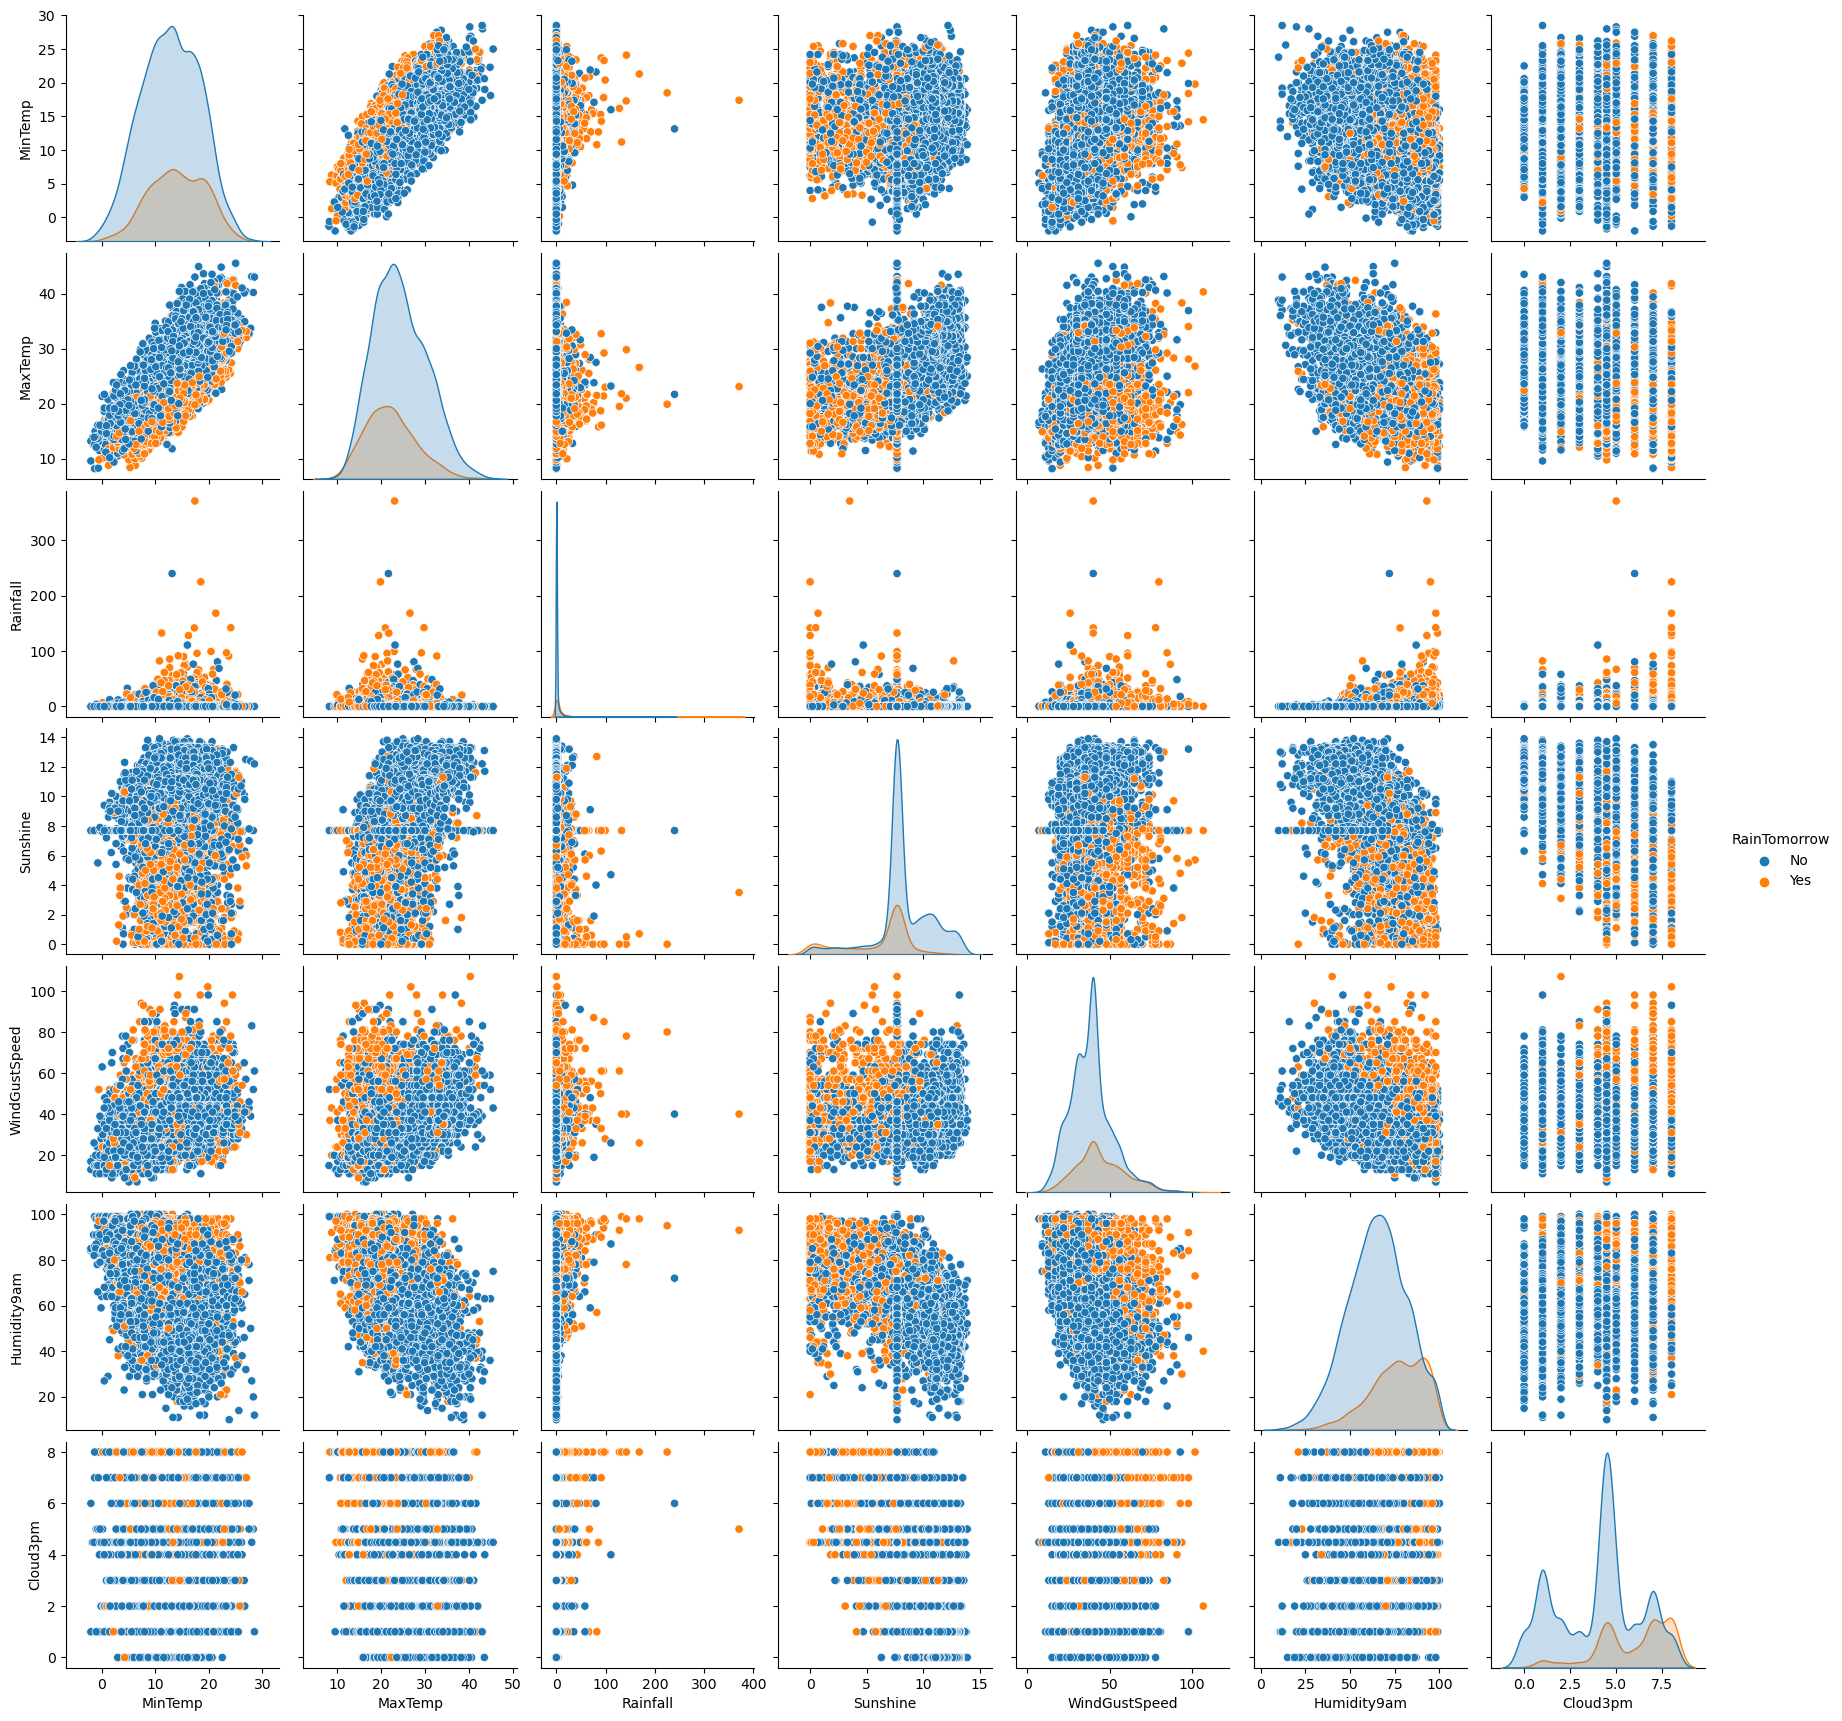

In [17]:
# Pairplot for pairwise relationships between numeric features
# Choose a subset of columns to include in the pair plot

important_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed','Humidity9am','Cloud3pm','RainTomorrow']

df_subset = df[important_columns]

# Create a pair plot with "RainTomorrow" as the hue
sns.pairplot(df_subset, diag_kind='kde', hue='RainTomorrow')

# Show the plot
plt.show()

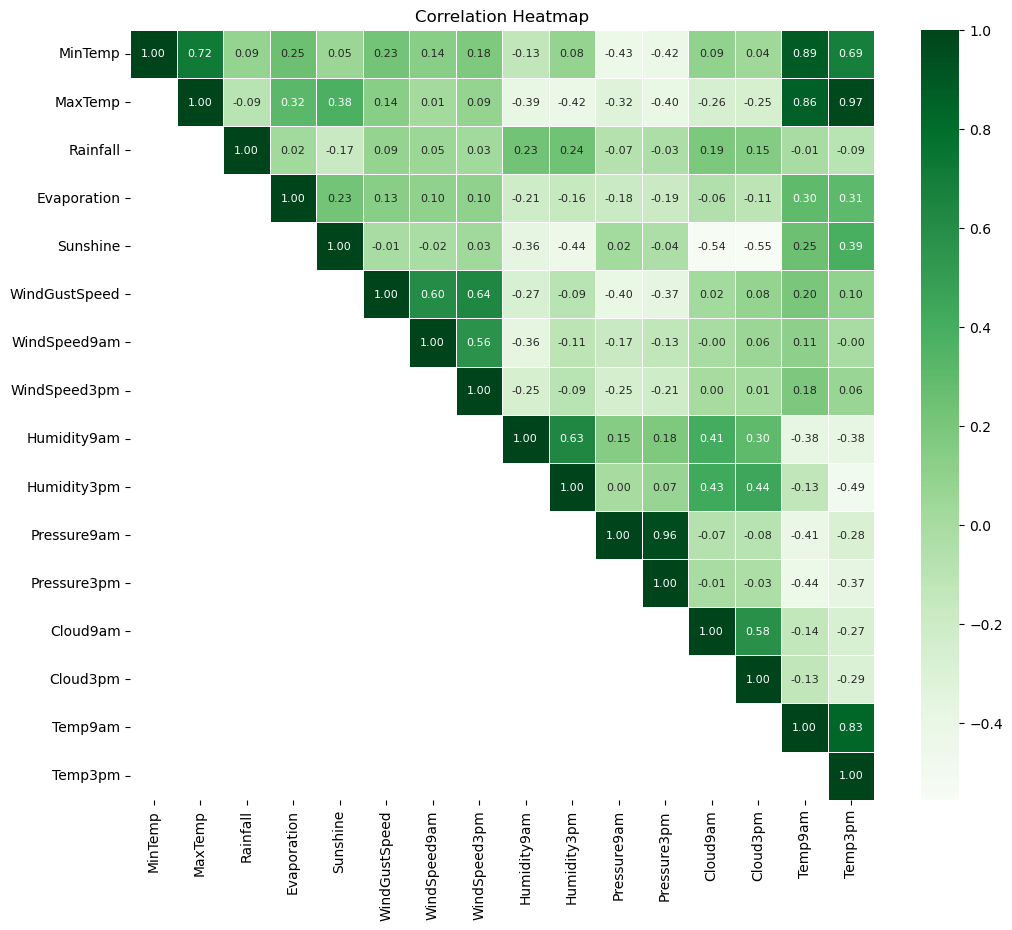

In [18]:
# Heatmap to visualize correlations between features
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

# Create a mask to hide the lower triangle of the heatmap
mask = np.tri(*correlation_matrix.shape, k=-1, dtype=bool)

sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5,fmt=".2f", annot_kws={"size": 8}, mask=mask)

plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.title('Correlation Heatmap')
plt.show()

Min-Max temp is highly correlated with Temp3pm and Temp9pm . Pressure3pm also highly correlated with Pressure9am.  

Box-plot

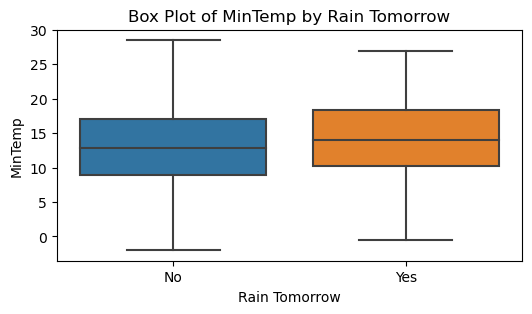

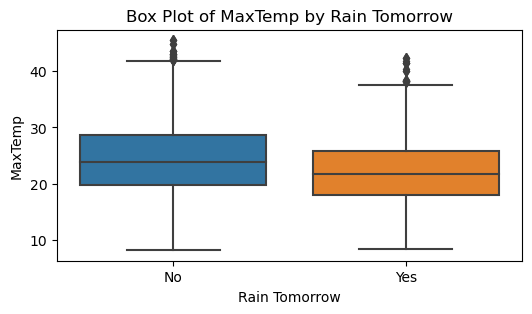

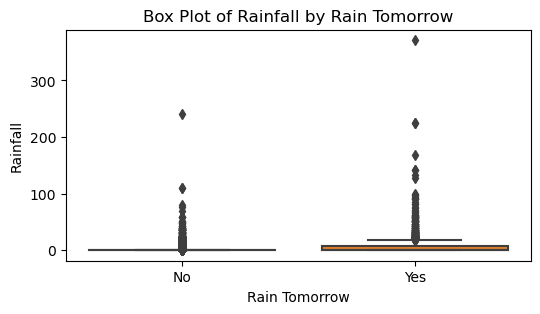

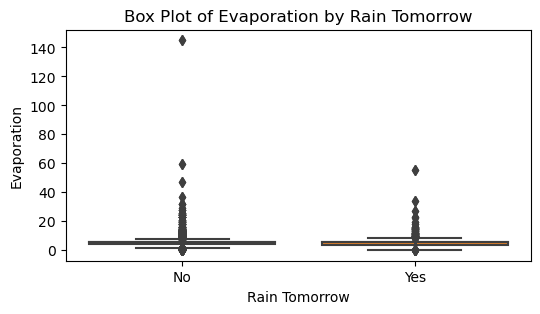

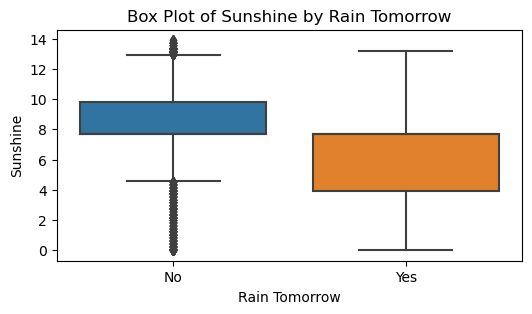

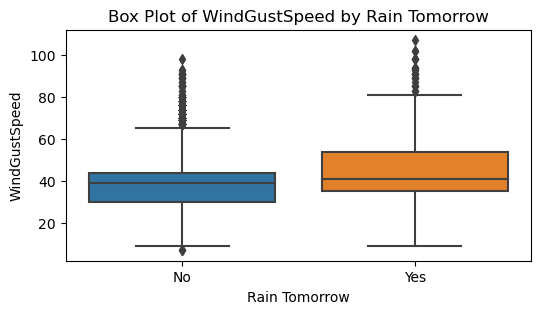

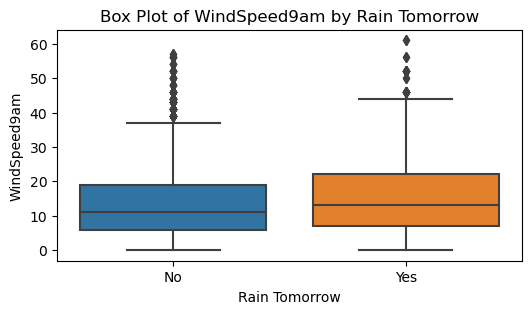

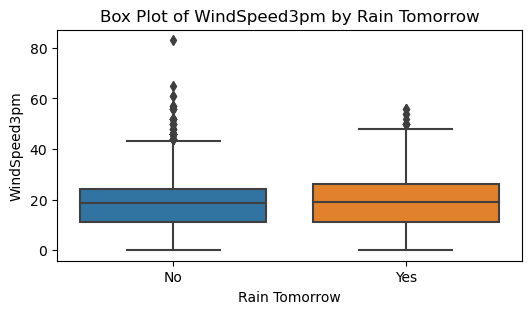

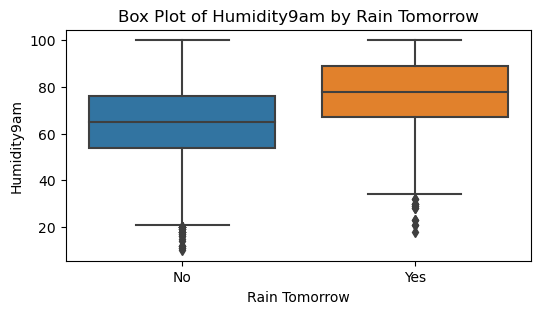

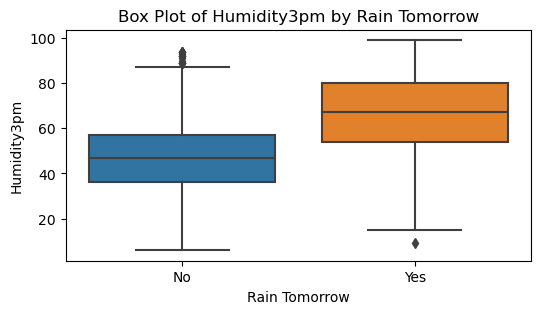

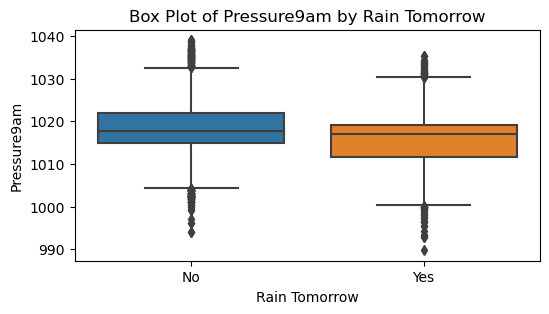

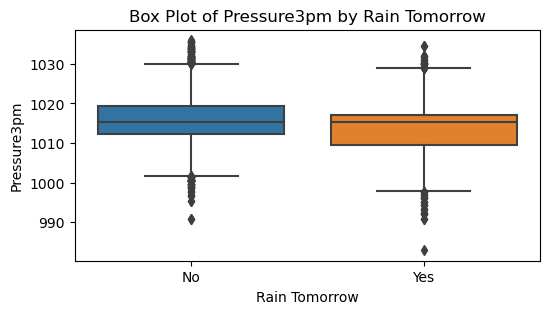

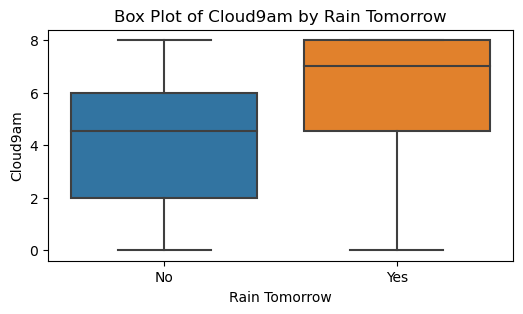

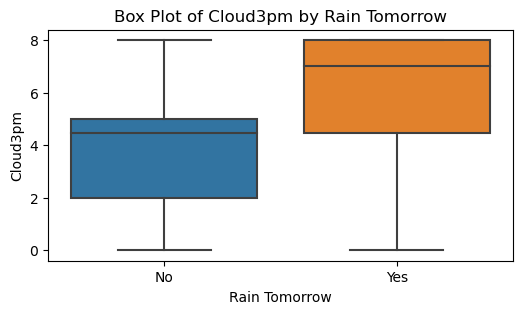

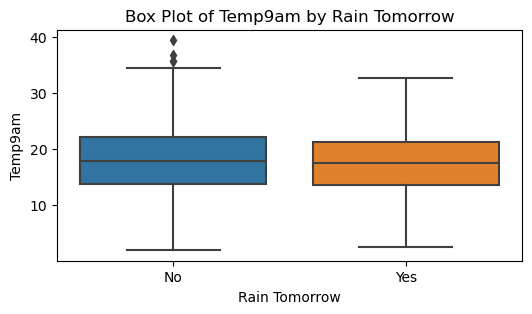

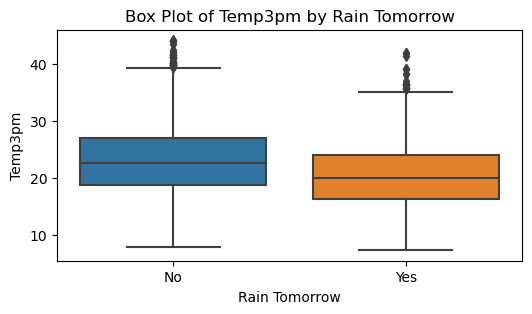

In [19]:
# Create box plots for each numerical column, comparing with "RainTomorrow"
for column in numerical_columns:
    plt.figure(figsize=(6, 3))  # Adjust the figure size as needed
    sns.boxplot(x='RainTomorrow', y=column, data=df)
    plt.xlabel('Rain Tomorrow')
    plt.ylabel(column)
    plt.title(f'Box Plot of {column} by Rain Tomorrow')
    plt.show()



All columns have unique value which represent the characteristics of rain fall prediction .

skewness removal

In [20]:
# Calculate the skewness of each column
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
MinTemp          -0.073106
MaxTemp           0.391990
Rainfall         13.160015
Evaporation      14.083801
Sunshine         -0.747040
WindGustSpeed     0.745743
WindSpeed9am      0.940199
WindSpeed3pm      0.504880
Humidity9am      -0.254517
Humidity3pm       0.120126
Pressure9am      -0.032475
Pressure3pm      -0.015923
Cloud9am         -0.339559
Cloud3pm         -0.262710
Temp9am          -0.008452
Temp3pm           0.404300
dtype: float64


We use the different method for different column according to data distribution.

In [21]:
from scipy.stats import boxcox

# Log transformation for 'Rainfall' and 'Evaporation'
df['Rainfall'] = np.log1p(df['Rainfall'])
df['Evaporation'] = np.log1p(df['Evaporation'])

# Box-Cox transformation for 'Sunshine' and 'WindGustSpeed'
df['Sunshine'] = df['Sunshine'] + 0.01  # Add a small constant (e.g., 0.01) to avoid zero values
df['Sunshine'], _ = boxcox(df['Sunshine'])
df['WindGustSpeed'], _ = boxcox(df['WindGustSpeed'])

# Square root transformation for 'WindSpeed9am' and 'WindSpeed3pm'
df['WindSpeed9am'] = np.sqrt(df['WindSpeed9am'])
df['WindSpeed3pm'] = np.sqrt(df['WindSpeed3pm'])


In [22]:
# Calculate the skewness of each column after transformation 
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
MinTemp         -0.073106
MaxTemp          0.391990
Rainfall         1.858747
Evaporation     -0.407624
Sunshine        -0.430326
WindGustSpeed    0.010787
WindSpeed9am    -0.414720
WindSpeed3pm    -0.669600
Humidity9am     -0.254517
Humidity3pm      0.120126
Pressure9am     -0.032475
Pressure3pm     -0.015923
Cloud9am        -0.339559
Cloud3pm        -0.262710
Temp9am         -0.008452
Temp3pm          0.404300
dtype: float64


All columns, now have satisfactory value for our model building.

Checking Variance Inflation Factor (VIF)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the features for which we want to calculate VIF
selected_features = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
print(vif_data)


          Feature            VIF
0         MinTemp      55.783178
1         MaxTemp     423.822973
2        Rainfall       1.837952
3     Evaporation      23.339626
4        Sunshine      12.133027
5   WindGustSpeed      63.725059
6    WindSpeed9am      10.543321
7    WindSpeed3pm      20.918286
8     Humidity9am      67.517424
9     Humidity3pm      47.558330
10    Pressure9am  466793.216914
11    Pressure3pm  464479.910750
12       Cloud9am       8.643808
13       Cloud3pm       8.790577
14        Temp9am     182.157225
15        Temp3pm     497.926573


Looking at our VIF values, several variables have VIF values above 5, which suggests a high degree of multicollinearity.
Here are a few observations:
'MaxTemp,' 'Pressure9am,' 'Pressure3pm,' and 'Temp3pm' have extremely high VIF values, indicating a very high level of multicollinearity.
'MinTemp,' 'Evaporation,' 'WindGustSpeed,' 'Humidity9am,' and 'Humidity3pm' also have relatively high VIF values.

We use the Random Forest Classifier for features selection. Get a list of important columns which reduce multicollinearity in model.

          Feature  Importance
9     Humidity3pm    0.185460
2        Rainfall    0.082426
8     Humidity9am    0.066573
5   WindGustSpeed    0.065719
13       Cloud3pm    0.063284
4        Sunshine    0.058905
11    Pressure3pm    0.058788
15        Temp3pm    0.056214
0         MinTemp    0.053049
1         MaxTemp    0.052825
14        Temp9am    0.052524
10    Pressure9am    0.051708
7    WindSpeed3pm    0.044930
6    WindSpeed9am    0.040572
12       Cloud9am    0.036406
3     Evaporation    0.030616


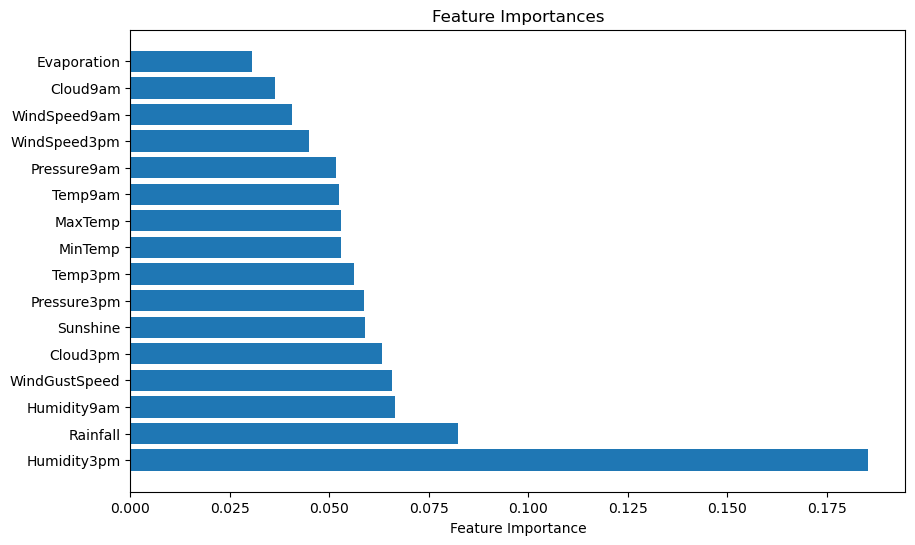

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Separate the features (X) and the target variable (y)
X = df.drop(['Date','Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday','RainTomorrow'], axis=1)  
y = df['RainTomorrow']  

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importances from the trained model
importances = clf.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances['Importance'], align='center')
plt.yticks(range(len(feature_importances)), feature_importances['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit a RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)

# Get feature importances from the trained model
importances = clf.feature_importances_

# Set a threshold for feature importance
threshold = 0.05  # Adjust this threshold as needed

# Select the indices of important features based on the threshold
important_feature_indices = [i for i, importance in enumerate(importances) if importance > threshold]

# Get the names of the important features
important_features = [X.columns[i] for i in important_feature_indices]

# Create a new DataFrame with only the important features
X_important = X[important_features]
X_important

,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.470004,8.408572,8.122466,71.0,22.0,1007.7,1007.1,4.483177,16.9,21.8
1,7.4,25.1,0.000000,8.408572,8.122466,44.0,25.0,1010.6,1007.8,4.483177,17.2,24.3
2,12.9,25.7,0.000000,8.408572,8.299333,38.0,30.0,1007.6,1008.7,2.000000,21.0,23.2
3,9.2,28.0,0.000000,8.408572,5.974907,45.0,16.0,1017.6,1012.8,4.483177,18.1,26.5
4,17.5,32.3,0.693147,8.408572,7.847287,82.0,33.0,1010.8,1006.0,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0.000000,8.408572,6.824466,59.0,27.0,1024.7,1021.2,4.483177,9.4,20.9
8420,2.8,23.4,0.000000,8.408572,6.824466,51.0,24.0,1024.6,1020.3,4.483177,10.1,22.4
8421,3.6,25.3,0.000000,8.408572,5.703584,56.0,21.0,1023.5,1019.1,4.483177,10.9,24.5
8422,5.4,26.9,0.000000,8.408572,7.459637,53.0,24.0,1021.0,1016.8,4.483177,12.5,26.1


In [29]:
X_important.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

Data Leakage Risk: Data leakage can occur if there's a direct or indirect relationship between the "RainToday" column and the target variable "RainTomorrow." If "RainToday" provides information that the model would not have at the time of prediction, it can lead to over-optimistic model performance metrics.it could introduce data leakage because the model might use future information to predict the target variable. This could result in unrealistically good model performance.

In [33]:
df.drop('RainToday', axis=1, inplace=True)

Encoding 

Extract relevant date component such as month. These components can capture seasonal, monthly based patterns.

In [30]:
# Extract day and month and create new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [31]:
# Apply cyclical encoding for month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop the original 'Month' column 
df.drop(columns=['Month'], inplace=True)

In [34]:
categorical_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [35]:
import category_encoders as ce

# Define the columns to be encoded
columns_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Create a BinaryEncoder instance
binary_encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Apply binary encoding to the DataFrame
df = binary_encoder.fit_transform(df)


Normalization of data

In [37]:
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
x = df.drop(columns=['RainTomorrow','Date','Evaporation','Sunshine','Cloud9am','WindSpeed9am', 'WindSpeed3pm'])
Y = df["RainTomorrow"]


In [38]:
# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

5.Model Development

5.1 Testing Candidate models

In [39]:
#Importing Machine learning Model library
from sklearn.svm  import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_curve

Splitting Data into train test

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=39)

Classification Algorithms

Logistics Regression

In [41]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))

Logistics Regression
Accuracy Score : 0.8131107491856677
Confusion matrix : [[1700  146]
 [ 313  297]]


Decision Tree Classifier

In [42]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred=DTC.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Decision Tree Classifier
Accuracy Score : 0.8387622149837134


Random Forest Classifier

In [43]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred=RFC.predict(X_test)
print('Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accu = accuracy_score(Y_test, y_pred)

Random Forest Classifier
Accuracy Score : 0.875


AdaBoost Classifier

In [44]:
Abc=AdaBoostClassifier()
Abc.fit(X_train,Y_train)
y_pred=Abc.predict(X_test)
print('AdaBoost Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

AdaBoost Classifier
Accuracy Score : 0.8224755700325733


Support Vector Machine Classifier

In [45]:
svc= SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print('Support Vector Machine Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Support Vector Machine Classifier
Accuracy Score : 0.8399837133550488


Bagging Classifier

In [46]:
BC= BaggingClassifier()
BC.fit(X_train,Y_train)
y_pred = BC.predict(X_test)
print('Bagging Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accub = accuracy_score(Y_test, y_pred)

Bagging Classifier
Accuracy Score : 0.8721498371335505


Random Forest Classifier gives highest Accuracy Score : 0.875 .

Cross Validation Score

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# cross validation score for random forest classifier
score= cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -', Accu-score.mean() )

[0.85042735 0.85339035 0.88515577 0.82101405 0.83323152]
0.8486438085094165
Difference between accuracy score and cross validation score is - 0.026356191490583547


In [49]:
# cross validation score for Bagging Classifier
score= cross_val_score(BC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.82722833 0.84239462 0.88210141 0.79169212 0.82162492]
0.8330082799844559
Difference between accuracy score and cross validation score is - 0.03914155714909462


So our best model is Random Forest Classifier which have less difference between accuracy score and cross validation score.

5.2 Hyperparameter tuning and Performance of model

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
}


In [52]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X, y)  # X and y are your feature matrix and target variable

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
best_rf_classifier = grid_search.best_estimator_

# Fit the best model on your data
best_rf_classifier.fit(X, y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [54]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: {:.4f}".format(grid_search.best_score_))

Best Hyperparameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 0.8512


Final Model

In [55]:
best_hyperparameters = grid_search.best_params_

In [67]:
Final_model = RandomForestClassifier(**best_hyperparameters)
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('Final Model Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
print('classification Report :',classification_report(Y_test, y_pred))

Final Model Random Forest Classifier
Accuracy Score : 0.879071661237785
Confusion matrix : [[1783   63]
 [ 234  376]]
classification Report :               precision    recall  f1-score   support

          No       0.88      0.97      0.92      1846
         Yes       0.86      0.62      0.72       610

    accuracy                           0.88      2456
   macro avg       0.87      0.79      0.82      2456
weighted avg       0.88      0.88      0.87      2456



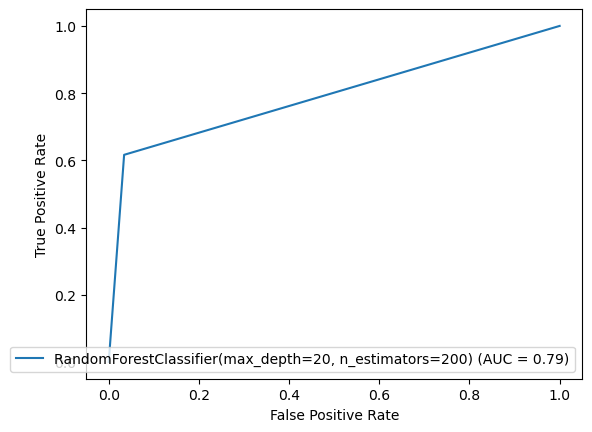

In [68]:
from sklearn import metrics

# Assuming 'Yes' represents the positive class and 'No' represents the negative class
# we can use a simple mapping to convert them to binary labels
Y_test_binary = Y_test.map({'No': 0, 'Yes': 1})
y_pred_binary = np.where(y_pred == 'Yes', 1, 0)

fpr, tpr, thresholds = metrics.roc_curve(Y_test_binary, y_pred_binary)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()


5.3 Saving model

In [58]:
import joblib 
joblib.dump(Final_model,'Rainfall Weather Forecasting Project.pkl')

['Rainfall Weather Forecasting Project.pkl']

5.4 Predicting the Final Model

In [59]:
prediction = Final_model.predict(X_test)

In [60]:
Actual = np.array(Y_test)
df_pred = pd.DataFrame()
df_pred["Predicted RainTomorrow"] = prediction
df_pred["Actual RainTomorrow"] = Actual
df_pred.head(10)

,Predicted RainTomorrow,Actual RainTomorrow
0,No,No
1,No,Yes
2,No,No
3,No,No
4,Yes,No
5,No,No
6,No,No
7,Yes,Yes
8,No,No
9,Yes,Yes


b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [3]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\dataset3-main\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Remove rows with missing values in the target column ("RainTomorrow")
df = df.dropna(subset=['RainTomorrow'])

# Impute missing values for numerical columns with the mean
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                     'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                     'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing values for categorical columns with the mode
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
from scipy.stats import boxcox

# Log transformation for 'Evaporation'
df['Evaporation'] = np.log1p(df['Evaporation'])

# Box-Cox transformation for 'Sunshine' and 'WindGustSpeed'
df['Sunshine'] = df['Sunshine'] + 0.01  # Add a small constant (e.g., 0.01) to avoid zero values
df['Sunshine'], _ = boxcox(df['Sunshine'])
df['WindGustSpeed'], _ = boxcox(df['WindGustSpeed'])

# Square root transformation for 'WindSpeed9am' and 'WindSpeed3pm'
df['WindSpeed9am'] = np.sqrt(df['WindSpeed9am'])
df['WindSpeed3pm'] = np.sqrt(df['WindSpeed3pm'])


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the features for which we want to calculate VIF
selected_features = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
print(vif_data)

          Feature            VIF
0         MinTemp      55.585676
1         MaxTemp     423.031499
2        Rainfall       1.203476
3     Evaporation      23.334899
4        Sunshine      12.142588
5   WindGustSpeed      63.024652
6    WindSpeed9am      10.523984
7    WindSpeed3pm      20.886434
8     Humidity9am      64.385441
9     Humidity3pm      47.560634
10    Pressure9am  460041.399308
11    Pressure3pm  457957.420286
12       Cloud9am       8.631832
13       Cloud3pm       8.784440
14        Temp9am     181.682835
15        Temp3pm     498.598490


In [7]:
df.drop(['Pressure9am','Temp3pm','Temp9am'], axis=1, inplace=True)

Data Leakage Risk: 'RainToday' and 'RainTomorrow' columns in the prediction of 'Rainfall' can lead to data leakage and multicollinearity issues since these columns likely provide information about future rainfall. This could artificially inflate the model's performance but make it less useful for real-world predictions.
The goal is to predict rainfall without relying on future weather conditions. Removing these columns ensures that your model is making predictions based on past and independent variables.

But we use the 'RainToday' column for easyness of model to only predicted  quantity of rain . When model predicte rain happended or not and what may be quantity of rain that make model more less predictable and accurate. 

In [8]:
df.drop(['RainTomorrow'], axis=1, inplace=True)

Encoding

In [9]:
# Extract day and month and create new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Apply cyclical encoding for month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop the original 'Month' column 
df.drop(columns=['Month'], inplace=True)

In [10]:
import category_encoders as ce

# Define the columns to be encoded
columns_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']

# Create a BinaryEncoder instance
binary_encoder = ce.BinaryEncoder(cols=columns_to_encode)

# Apply binary encoding to the DataFrame
df = binary_encoder.fit_transform(df)


Normalization of data

In [11]:
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
x = df.drop(columns=['Rainfall','Date'])
Y = df["Rainfall"]

# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

5.Model Development

5.1 Testing Candidate models

In [12]:
#Importing Machine learning Model library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.svm import SVR

Model: Linear Regression
Mean Squared Error: 56.66815679841509
R-squared (R2): 0.3086938942411307
Model: Ridge Regression
Mean Squared Error: 56.668241413974584
R-squared (R2): 0.30869286199910584
Model: Lasso Regression
Mean Squared Error: 59.98829517618026
R-squared (R2): 0.26819086639997103
Model: Random Forest Regressor
Mean Squared Error: 33.75577114375826
R-squared (R2): 0.5882066399425967
Model: SVR
Mean Squared Error: 65.71591116019958
R-squared (R2): 0.1983185408313125
Model: Decision Tree Regressor
Mean Squared Error: 65.81738366242824
R-squared (R2): 0.19708065761222626
Best Model: Random Forest Regressor with R-squared (R2) score of 0.5882066399425967


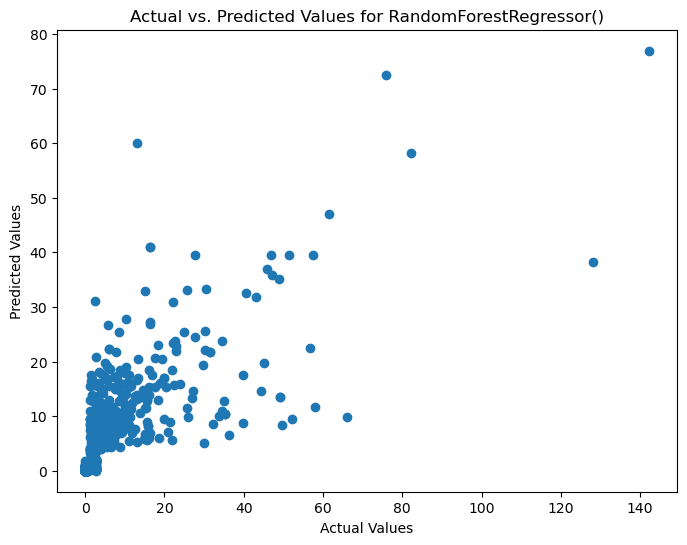

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=39)

# A list of regression models to evaluate for regression
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100)),
    ('SVR', SVR(kernel='linear')),
    ('Decision Tree Regressor', DecisionTreeRegressor())
]

# Initialize variables to keep track of the best model and its performance
best_model = None
best_score = -np.inf

# Iterate through the models, fit them, and evaluate their performance
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics (we can add more if needed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    
    # Check if this model has the best performance so far
    if r2 > best_score:
        best_score = r2
        best_model = model_name

# Print the best model
print(f'Best Model: {best_model} with R-squared (R2) score of {best_score}')

# We can visualize the actual vs. predicted values for the best model
best_model_index = [model[0] for model in models].index(best_model)
best_model = models[best_model_index][1]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values for {best_model}")
plt.show()


Hyper parameter tunning for Random Forest regression .

In [14]:
# Separate the features (X) and the target variable (y)
X = df.drop(['Rainfall','Date'], axis=1)  
y = df['Rainfall']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [18]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_rf = grid_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 73.29905724380109
R-squared (R2) Score: 0.3714013482807361


Cross Validation

In [19]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(best_rf, X, y, cv = 5)
print('Cross Validation Score :')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :
Score : [0.22482017 0.49469398 0.71532427 0.42704486 0.45608781]
Mean Score : 0.46359421867414785
Std deviation : 0.15667830941012018


We can see that model score is not consistence over different cross fold validation. It show how lot of other factor affect the model.
And make more difficult to predicte Rainfall accurately.

Saving model

In [20]:
import joblib
joblib.dump(best_rf,'Rainfall Weather Forecasting1.pkl')

['Rainfall Weather Forecasting1.pkl']

Predicting the Final Model

In [24]:
actual_Rainfall= y_test

# Make predictions for the selected data points
Pre_Rainfall = best_rf.predict(X_test)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Actual Rainfall': actual_Rainfall,
    'Predicted Rainfall': Pre_Rainfall
})

result_df.head(10)

,Actual Rainfall,Predicted Rainfall
2144,1.6,11.487098
3731,0.0,0.153741
3051,91.4,64.724000
6927,0.0,0.082658
1330,0.0,0.073625
6024,0.0,0.181916
5441,0.0,0.069269
2569,0.0,0.122524
3926,1.0,0.617450
5586,0.0,0.295849


By this model we may estimate about quantity of Rainfall . WE can only make generalized approaches but we can not make Prediction of Rainfall accurately due its also depend on lot of other factor . Which make prediction of model difficult.